In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [36]:
data = pd.read_csv('cleaned_data/cleaned_train_data_for_subtask1.csv')

print(data.shape)
display(HTML(data.head().to_html()))


(21000, 4)


,#1_tweetid,#2_tweet,#3_country_label,#2_tweet_clean
0,TRAIN_0,حاجة حلوة اكيد,Egypt,حاجه حلوه اكيد
1,TRAIN_1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشوا ويسرقوا ويقتلو شعوبهم ويعملوا لصالح اعدائهم,Iraq,عم بشتغلوا لشعب الاميركي اما نحن يكذبوا ويغشوا ويسرقوا ويقتلو شعوبهم ويعملوا لصالح اعداءهم
2,TRAIN_2,ابشر طال عمرك,Saudi_Arabia,ابشر طال عمرك
3,TRAIN_3,منطق 2017: أنا والغريب علي إبن عمي وأنا والغريب وإبن عمي علي أخويا. #قطع_العلاقات_مع_قطر #موريتانيا_مع_قطر,Mauritania,منطق انا والغريب علي ابن عمي وانا والغريب وابن عمي علي اخويا قطع العلاقات مع قطر موريتانيا مع قطر
4,TRAIN_4,شهرين وتروح والباقي غير صيف ملينا,Algeria,شهرين وتروح والباقي غير صيف ملينا


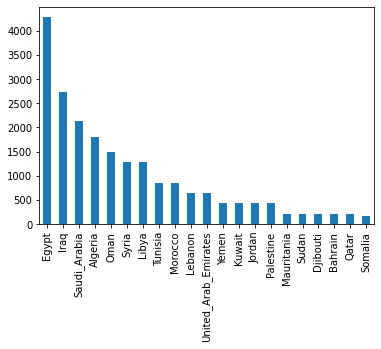

In [37]:
data["#3_country_label"].value_counts().plot.bar()
y = data["#3_country_label"]

In [39]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=119d770fd3a2797a5c67f20ed1f451a23e575ec4003e33253550a4ef4a9b0ba7
  Stored in directory: c:\users\maryam\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [40]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y), y)

C:\Users\maryam\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['Algeria' 'Bahrain' 'Djibouti' 'Egypt' 'Iraq' 'Jordan' 'Kuwait' 'Lebanon'
 'Libya' 'Mauritania' 'Morocco' 'Oman' 'Palestine' 'Qatar' 'Saudi_Arabia'
 'Somalia' 'Sudan' 'Syria' 'Tunisia' 'United_Arab_Emirates' 'Yemen'], y=0               Egypt
1                Iraq
2        Saudi_Arabia
3          Mauritania
4             Algeria
             ...     
20995         Algeria
20996            Iraq
20997            Iraq
20998           Egypt
20999         Lebanon
Name: #3_country_label, Length: 21000, dtype: object as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [41]:
class_weights

array([0.5527916 , 4.65116279, 4.65116279, 0.2334812 , 0.36643459,
       2.33100233, 2.33100233, 1.55279503, 0.77760498, 4.65116279,
       1.16550117, 0.66622252, 2.3364486 , 4.65116279, 0.46728972,
       5.81395349, 4.65116279, 0.77700078, 1.16414435, 1.5576324 ,
       2.33100233])

The plot shows that data is biased to OBJ label so we'll need to augment data for other labels.

In [10]:
!pip install pyarabic

  Created wheel for pyarabic: filename=PyArabic-0.6.10-py3-none-any.whl size=113327 sha256=523d915e235dc3601c71d24adf8c2f3a2d79ad23724a04cbdec22ec9603af992
  Stored in directory: c:\users\maryam\appdata\local\pip\cache\wheels\fe\66\1f\0d50cbcd83faaff2f1bda4b945de19d3d513995ff94ae4e4d5
Successfully built pyarabic


In [28]:
 print(len(data.loc[data['#3_country_label'] == "Egypt"]["#2_tweet"]))
data.loc[data['#3_country_label'] == country]

4283


,#1_tweetid,#2_tweet,#3_country_label,#2_tweet_clean
169,TRAIN_169,لكن م شاء الله ،، كونك تتذكرها دي حاجة بعيدة,Sudan,لكن م شاء اله كونك تذكرها دي حاجه بعيده
375,TRAIN_375,ايه .. بعد اول صبي وفي اول حفل عيد زواج راح تل...,Sudan,ايه بعد اول صبي وفي اول حفل عيد زواج راح تلقي ...
449,TRAIN_449,اديتني نصيحة وقلت ليك لا شكراً وين حسا قلت جابرني,Sudan,اديتني نصيحه وقلت ليك لا شكرا وين حسا قلت جابرني
581,TRAIN_581,ريك شنو في الظرافة دي,Sudan,ريك شنو في الظرافه دي
616,TRAIN_616,USER USER USER اي معاك حق ،، لكن الكتابة...,Sudan,اي معاك حق لكن الكتابه بتجذب الناس الظابطين
...,...,...,...,...
20129,TRAIN_20129,USER وده الحاصل هسي,Sudan,وده الحاصل هسي
20153,TRAIN_20153,الحلو مر ..متوفر بكثره,Sudan,الحلو مر متوفر بكثره
20388,TRAIN_20388,A وكابتن كمان والله يا غازي شكلك اول العالم في...,Sudan,وكابتن كمان واله ياغازي شكلك اول العالم في ال...
20460,TRAIN_20460,لالا م في اي كسير تلج حاصل ،، لكن بي كسير تلج ...,Sudan,لالا م في اي كسير تلج حاصل لكن بي كسير تلج بي ...


# Augment Data

In [29]:
from nltk import sent_tokenize
import pandas as pd
import random
import pyarabic.araby as araby

def tokenize(text):
    '''text: list of text documents'''
    tokenized  = araby.tokenize(text)
    return tokenized

def shuffle_tokenized(text):
    random.shuffle(text)
    newl=list(text)
    shuffled.append(newl)
    return text


In [31]:

for country in data["#3_country_label"].unique()[1:]:
    augmented = []
    reps=[]
    for tweet in data.loc[data['#3_country_label'] == country]["#2_tweet_clean"]:
        tok = tokenize(tweet)
        shuffled= [tok]

        #print(ng_rev)
        for i in range(11):
        #generate 11 new reviews
            shuffle_tokenized(shuffled[-1])
           # print(shuffled)
        for k in shuffled:
            '''create new review by joining the shuffled sentences'''
            s = ' '
            new_rev = s.join(k)

            if new_rev not in data["#2_tweet"].values :
                df = pd.DataFrame({
                        "#3_country_label" : [country],
                        "#2_tweet":[new_rev],
                    "#2_tweet_clean":[new_rev]
                        })
                data = data.append(df, ignore_index = True,sort=False)
                augmented.append(new_rev)
        if (len(data.loc[data['#3_country_label'] == country]["#2_tweet"]) >= len(data.loc[data['#3_country_label'] == "Egypt"]["#2_tweet"])):
            break
    print(len(data.loc[data['#3_country_label'] == country]["#2_tweet"]))


4283
4291
2425
4290
4283
4293
4291
4288
4292
2385
4287
4286
4285
2452
2386
4284
4286
4283
1847
2288


In [34]:
data.to_csv('data/AugmentedData.csv')

# Read Augmented data

<AxesSubplot:>

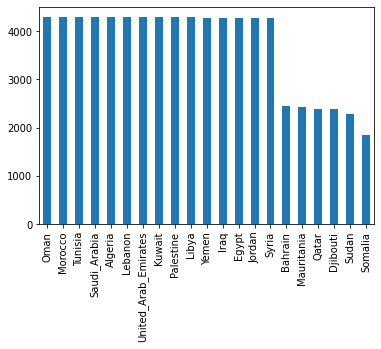

In [32]:
data["#3_country_label"].value_counts().plot.bar()

In [33]:
data["#2_tweet"].tail()

78083    بهذا ما لانو ب المهم حسا الموضوع وبهمهم لا بال...
78084    الواحد العداله من الوحيدين والفوره الموضوع ديل...
78085    انو يطول من دا بيتاخد اكتفي وكانو القدر بالو ل...
78086    القضيه لانو القدر تحقيق لانو حسا طبعا الوحيدين...
78087    العبيطه بهذا الوحيدين وكانو ويفهم ديل المهم ب ...
Name: #2_tweet, dtype: object

# Read Reviews DataSet


In [105]:
data = pd.read_csv('data/AugmentedData2.csv',index_col=False)

In [99]:
reviews = reviews[["rating","review"]]
reviewspos = reviews[reviews["rating"]>=4]
reviewsneut = reviews[reviews["rating"] == 3]
reviewsneg = reviews[reviews["rating"]<3]
reviewspos.head()
dfpos = pd.DataFrame(reviewspos.review.values,columns=['text'])
dfpos["label"] = "POS"
data = data.append(dfpos,ignore_index=True,sort=False)
dfpos = pd.DataFrame(reviewsneg.review.values,columns=['text'])
dfpos["label"] = "NEG"

data = data.append(dfpos,ignore_index=True,sort=False)

dfpos = pd.DataFrame(reviewsneut.review.values,columns=['text'])
dfpos["label"] = "NEUTRAL"
data = data.append(dfpos,ignore_index=True,sort=False)


dfpos.head()


,text,label
0,مرضي. . حمام السباحه لايعمل و الاضاءه في الغرف...,NEUTRAL
1,“جيد”. موقع الفندق. اقمت سته ايام والمسبح عليه...,NEUTRAL
2,مقبول. لا شي كل شي مجرد عادي . لم يعجبني عدم ا...,NEUTRAL
3,“الفندق عادي جدا”. . الخدمة ليست على المستوى ا...,NEUTRAL
4,مرضي. خدمة الزبون ومعاملة الطاقم ...والموقع .....,NEUTRAL


In [74]:
print("NEG")
reviewsneg.head()


NEG


,rating,review
1,2,“ممتاز”. النظافة والطاقم متعاون.
19,1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
48,1,“أسرة اماراتية.”. فندق مبنى على الطراز الحديث،...
77,2,“موظف المسبح سيء جدا”. . موظف المسبح سيء جدامع...
80,1,“اقامة ممتعة”. . الموقع والنظافة


In [64]:

print("NEUT")
reviewsneut.head()

NEUT


,rating,review
6,3,مرضي. . حمام السباحه لايعمل و الاضاءه في الغرف...
18,3,“جيد”. موقع الفندق. اقمت سته ايام والمسبح عليه...
28,3,مقبول. لا شي كل شي مجرد عادي . لم يعجبني عدم ا...
33,3,“الفندق عادي جدا”. . الخدمة ليست على المستوى ا...
36,3,مرضي. خدمة الزبون ومعاملة الطاقم ...والموقع .....


In [66]:
len(reviewspos)

276387